## Used Cars Price Prediction India

Our main Motive isto Analyze the Used Cars Dataset, found the key points from our data analysis and Create a Prediction Model to Predict the Prices of Used Cars on the basis of given factors/data or say given features in the dataset.

### About the Data

In [3463]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3464]:
df= pd.read_csv("used_cars_data.csv")
df

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN


In [3465]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


Let's familarize our data features:

1. **S.No** - Serial Number for the records
2. **Name** - Name of the Cars (Brand Names and Model Names)
3. **Location** - Location from where that particular car belongs to
4. **Year** - Bought Year
5. **Kilometers_Driven** - kms driven by the car till now
6. **Fuel_Type** - Fuel Type of the car(Petrol/Diesel/etc)
7. **Transmission**-A car's transmission, also known as a gearbox. It can be automatic or manual
8. **Owner** - Whether the car is the first owned or pre owned used car
9. **Mileage**- Mileage of the car
10. **Engine**- Engine of the car in CC
11. **Power**- Power/Horse Power of the car it creates
12. **Seats**- Number of seats in the car
13. **New_Price** - The On Road Price of the same New Car in the Market
14. **Price**- The Selling Price of the Car in the Market in Lakhs

The Price can be the selling Price of the car and new price can be the currently the price of same car on road if you buy.

In [3466]:
df['Price'].value_counts()
df['Price'].nunique()

1373

In [3467]:
df['New_Price'].value_counts()
df['New_Price'].nunique()

625

In [3468]:
df.shape

### Our dataset contains 7253 records with 14 features/columns.

(7253, 14)

### Cleaning of Data

#### Let's first check the Data Type 

In [3469]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


#### Mileage

In [3470]:
def mileage_func(x):
    x=str(x)
    if 'kmpl' in x:
        return float(x[:-5])
    elif 'km/kg' in x:
        return float(x[:-6])*1.4   ### To convert km/kg in kmpl unit
    else:
        try:
            return float(x)
        except:
            return None

In [3471]:
df['Mileage']= df['Mileage'].apply(lambda x: mileage_func(x))
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,37.24,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968 CC,140.8 bhp,5.0,NaN,17.74


### Engine

In [3472]:

df['Engine'].value_counts()

Engine
1197 CC    732
1248 CC    610
1498 CC    370
998 CC     309
1198 CC    281
          ... 
1489 CC      1
1422 CC      1
2706 CC      1
1978 CC      1
1389 CC      1
Name: count, Length: 150, dtype: int64

In [3473]:
def engine_func(x):
    x= str(x)
    if 'CC' in x:
        return int(x[:-3])
    # else:
    #     try:
    #         return int(x)
    #     except:
    #         return None

In [3474]:
df['Engine']=df['Engine'].apply(lambda x: engine_func(x))
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,37.24,998.0,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.8 bhp,5.0,NaN,17.74


### Power

In [3475]:
# df.Power.unique()

In [3476]:
def power_func(x):
    x=str(x)
    if x=='null bhp':
        return 0.0      ## I will change the null string values with value 0 for now
    if 'bhp' in x:
        return float(x[:-4])
    # else:
    #     try:
    #         return x
    #     except:
    #         return None

In [3477]:
df['Power']= df['Power'].apply(lambda x: power_func(x))
### I will be changing the datatype of Power column after handling the Nan Values.

In [3478]:
df['Power'].isnull().sum()

46

### New Price

In [3479]:
df.New_Price.value_counts()

New_Price
63.71 Lakh    6
95.13 Lakh    6
4.78 Lakh     6
33.36 Lakh    6
44.28 Lakh    5
             ..
6.83 Lakh     1
9.09 Lakh     1
7.17 Lakh     1
11.77 Lakh    1
18.16 Lakh    1
Name: count, Length: 625, dtype: int64

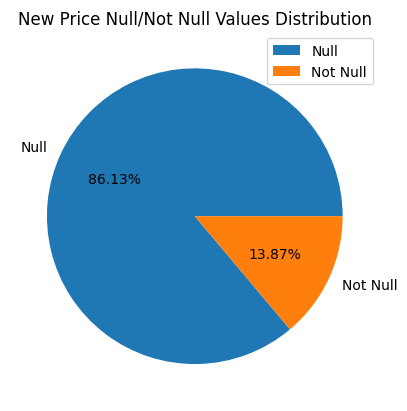

In [3480]:
a=df.New_Price.isnull().sum()
b=df.New_Price.notna().sum()
ab= pd.Series({'Null':a,'Not Null':b})
label=list(ab.index)
plt.pie(ab,labels=label,autopct='%.2f%%')
plt.title('New Price Null/Not Null Values Distribution')
plt.legend()

**For New Price we have a lot of Nan Values. The Distribution of Null Values contains more than 86% of the whole New_Price feature Data. So Removing this feature will be better for us as we are also going to focus on Price Feature of Cars for Model Creation also.**

In [3481]:
df.drop(['New_Price'], inplace=True, axis=1)

In [3482]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7207 non-null   float64
 11  Seats              7200 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 736.8+ KB


#### Now Let's see if our features have any Unjustifyed values like 0. I will converting them to Null values if there are any

In [3483]:
def hidden_func(df):
    d= pd.DataFrame(index=df.columns)
    d['0_count']=df[df==0].count()
    d['str_0_count']=df[df=='0.0'].count()
    d['space_count']=df[df==' '].count()
    d['null_count']=df.isnull().sum()
    return d
    
hidden_func(df)

,0_count,str_0_count,space_count,null_count
S.No.,1,0,0,0
Name,0,0,0,0
Location,0,0,0,0
Year,0,0,0,0
Kilometers_Driven,0,0,0,0
Fuel_Type,0,0,0,0
Transmission,0,0,0,0
Owner_Type,0,0,0,0
Mileage,81,0,0,2
Engine,0,0,0,46


In [3484]:
df.loc[df['Mileage']==0, 'Mileage']=np.nan
df.loc[df['Power']==0,'Power']=np.nan
df.loc[df['Seats']==0.0,'Seats']=np.nan

In [3485]:
hidden_func(df)

,0_count,str_0_count,space_count,null_count
S.No.,1,0,0,0
Name,0,0,0,0
Location,0,0,0,0
Year,0,0,0,0
Kilometers_Driven,0,0,0,0
Fuel_Type,0,0,0,0
Transmission,0,0,0,0
Owner_Type,0,0,0,0
Mileage,0,0,0,83
Engine,0,0,0,46


In [3486]:
df[df['Seats']==0.0]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price


### NULL Values

In [3487]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,37.24,998.0,58.16,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [3488]:
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                83
Engine                 46
Power                 175
Seats                  54
Price                1234
dtype: int64

In [3489]:
## Mileage
df[df['Mileage'].isnull()]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
14,14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,NaN,2179.0,115.0,5.0,17.50
67,67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,2019,15369,Diesel,Automatic,First,NaN,1950.0,194.0,5.0,35.67
79,79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,NaN,1086.0,NaN,5.0,1.30
194,194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,NaN,NaN,NaN,NaN,2.95
229,229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,NaN,1498.0,99.0,NaN,3.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6633,6633,Mahindra TUV 300 P4,Kolkata,2016,27000,Diesel,Manual,First,NaN,NaN,NaN,NaN,NaN
6697,6697,Hyundai Santro Xing XL,Jaipur,2007,85000,Petrol,Manual,Second,NaN,1086.0,NaN,5.0,NaN
6857,6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,NaN,2179.0,115.0,5.0,NaN
6957,6957,Honda Jazz 2020 Petrol,Kochi,2019,11574,Petrol,Manual,First,NaN,1199.0,88.7,NaN,NaN


In [3490]:
### Let's fill the values with Random Sample Imputation
def random_func(df,x):
    df[x+'random']=df[x]
    random_samp=df[x].dropna().sample(df[x].isnull().sum(), random_state=0)
    random_samp.index=df[df[x].isnull()].index
    df.loc[df[x].isnull(),x+'random']=random_samp
    df[x].plot(kind='kde')
    df[x+'random'].plot(kind='kde', alpha=0.6, color='yellow')
    plt.legend()

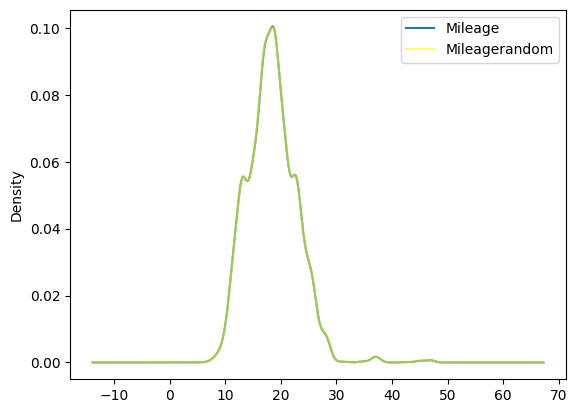

In [3491]:
random_func(df,'Mileage')

There is near to 0 changes after replacing our Null Values. So we are good to go

In [3492]:
df['Mileage']=df['Mileagerandom']
df.drop('Mileagerandom',inplace=True, axis=1)
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 46
Power                 175
Seats                  54
Price                1234
dtype: int64

In [3493]:
## Power
df[df.Power.isnull()].head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
76,76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.80,1399.0,NaN,5.0,2.00
79,79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,16.47,1086.0,NaN,5.0,1.30
89,89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.00,1086.0,NaN,5.0,2.10
120,120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.00,1086.0,NaN,5.0,0.85
143,143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.00,1086.0,NaN,5.0,1.67


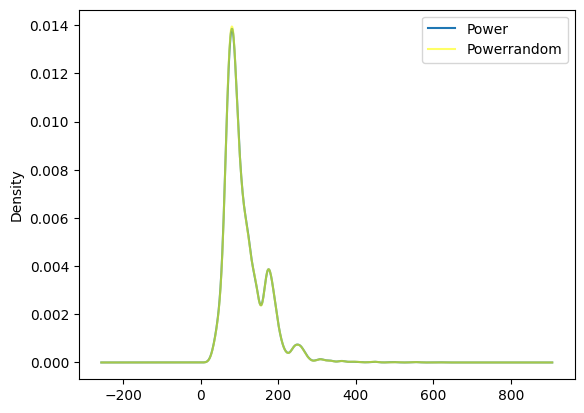

In [3494]:
random_func(df,'Power')

**As we can see there is near to no changes in Power feature and Power Random Imputation feature. Hence we will keep the Powerrandom feature as our Power feature**

In [3495]:
df['Power']=df['Powerrandom']
df.drop(['Powerrandom'], axis=1, inplace=True)

In [3496]:
### Here for Engine and Seats the Missingness of Data seems to be MCAR. I will be implementing Random Sample Imputation for them also.

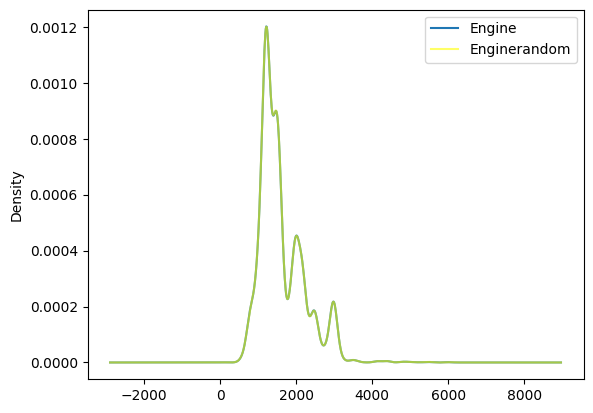

In [3497]:
random_func(df,'Engine')

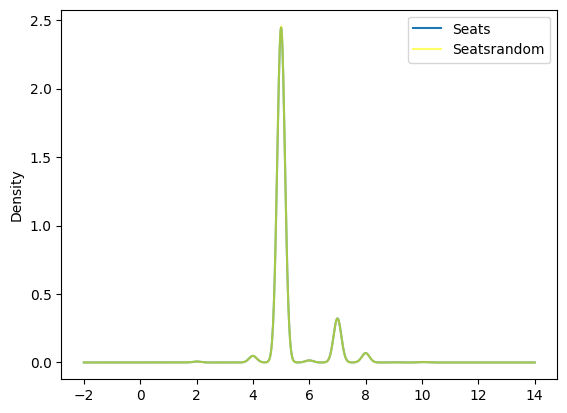

In [3498]:
random_func(df,'Seats')

In [3499]:
df['Engine']=df['Enginerandom']
df['Seats']=df['Seatsrandom']
df.drop(['Enginerandom','Seatsrandom'], axis=1, inplace=True)
# df.head()

In [3500]:
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
Price                1234
dtype: int64

In [3501]:
## Price

In [3502]:
df[df['Price'].isnull()]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
6019,6019,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,45.164,998.0,58.20,4.0,NaN
6020,6020,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.700,796.0,47.30,5.0,NaN
6021,6021,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.680,2393.0,147.80,7.0,NaN
6022,6022,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.590,1364.0,103.20,5.0,NaN
6023,6023,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.500,1197.0,82.85,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.540,1598.0,103.60,5.0,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.210,1197.0,103.60,5.0,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.080,1461.0,63.10,5.0,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.200,1197.0,103.60,5.0,NaN


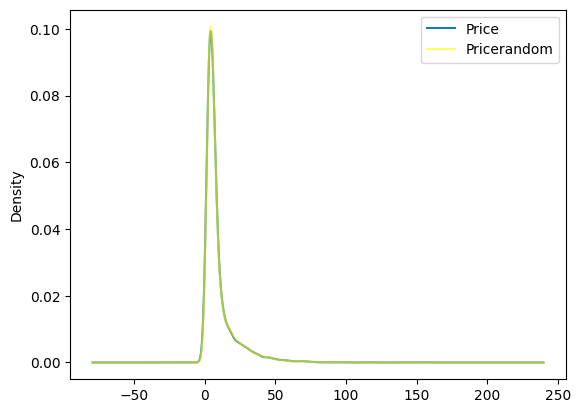

In [3503]:
random_func(df,'Price')

In [3504]:
df['Price']=df['Pricerandom']
df.drop('Pricerandom', axis=1, inplace=True)

In [3505]:
df.isnull().sum()

S.No.                0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

### Removing S.No Coloumn. Not required

In [3506]:
df.drop('S.No.', inplace=True, axis=1)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,37.24,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


### I will be keeping the Brand Name and Name of the Car. Needing the whole Brand and Model name is not required

In [3507]:
df['Name']=df['Name'].apply(lambda x: ' '.join(x.split()[:2]))
df['Name'].nunique()

223

## Outliers

In [3508]:
len(df)

7253

In [3509]:
def outliers_func(df, col):
    upper_lim = round(df[col].mean() + 3*df[col].std(),4)
    lower_lim= round(df[col].mean() - 3*df[col].std(),4)
# print(upper_lim , lower_lim)
    df=df[(df[col]<upper_lim) & (df[col]>lower_lim)]
    return df

In [3510]:
### Price Outliers
df= outliers_func(df,'Price')

In [3511]:
len(df)

7072

In [3512]:
## Power
df = outliers_func(df,'Power')
len(df)

6979

In [3513]:
## Engine
df = outliers_func(df,'Engine')
len(df)

6959

In [3514]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon,Mumbai,2010,72000,CNG,Manual,First,37.24,998.0,58.16,5.0,1.75
1,Hyundai Creta,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [3515]:
## Mileage
df = outliers_func(df,'Mileage')
len(df)

6911

In [3516]:
## Km Driven
df = outliers_func(df,'Kilometers_Driven')
len(df)

6838

In [3517]:
## Year

df= outliers_func(df,'Year')
len(df)

6782

In [3518]:
upper_lim = round(df['Seats'].mean() + 3*df['Seats'].std(),4)
lower_lim= round(df['Seats'].mean() - 3*df['Seats'].std(),4)
print(upper_lim , lower_lim)

7.5741 2.9711


In [3519]:
df=df[df['Seats']<=8]
len(df)

6775

In [3520]:
df['Seats'].value_counts()

Seats
5.0    5797
7.0     707
8.0     152
4.0      78
6.0      37
2.0       4
Name: count, dtype: int64

#### Seats Feature is more kind of Discrete Feature containing specific values. I will not be removing Seats feature Outliers.

## Exploratory Data Analysis

In [3521]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1,Hyundai Creta,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
5,Hyundai EON,Hyderabad,2012,75000,LPG,Manual,First,29.54,814.0,55.20,5.0,2.35


#### Univariate Data analysis

In [3522]:
## Name
df['BrandName']=df['Name'].apply(lambda x: ' '.join(x.split()[:1]))
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,BrandName
1,Hyundai Creta,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Honda Jazz,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,Maruti Ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Audi A4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi
5,Hyundai EON,Hyderabad,2012,75000,LPG,Manual,First,29.54,814.0,55.20,5.0,2.35,Hyundai


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Distribution of Cars Brand')

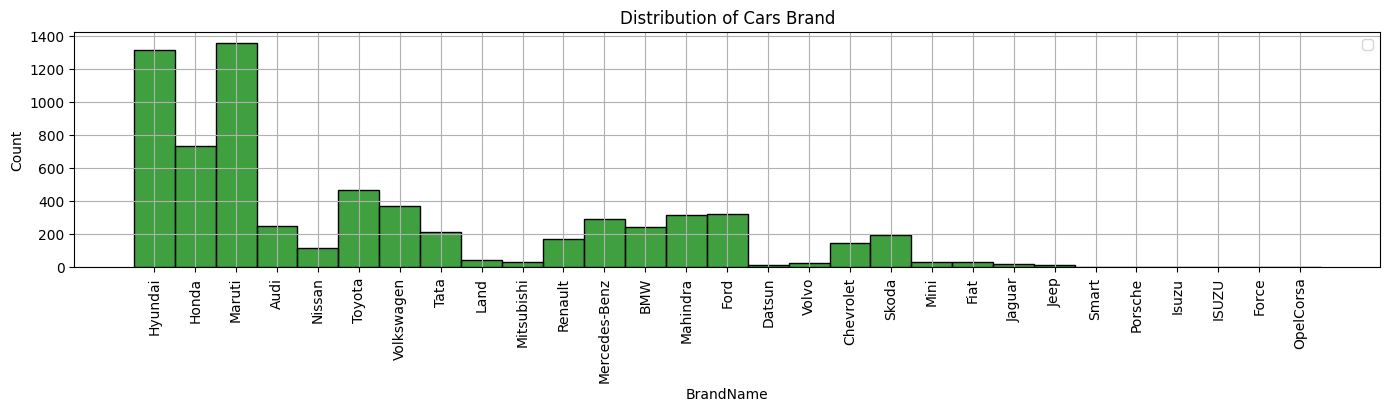

In [3523]:
plt.figure(figsize=(14,4))
sns.histplot(df['BrandName'], color='green')
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend()
plt.grid()
plt.title('Distribution of Cars Brand')

We can see the Distribution of Maruti and Hyundai Cars having highest weightage. Indeed these are the most bought and selling cars in India!!

In [3524]:
# df['Name'].str.split(' ').str[:1]  ** Imp**

Text(0.5, 1.0, 'Distribution of Cars Year Wise')

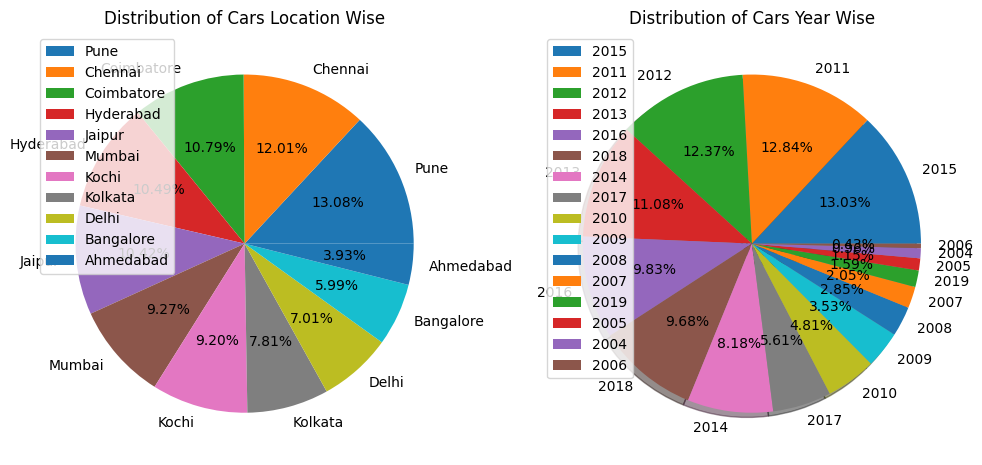

In [3525]:
## Location
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
label= list(df['Location'].unique())
plt.pie(df['Location'].value_counts(), autopct='%.2f%%', labels=label)
plt.legend()
plt.title('Distribution of Cars Location Wise')
plt.subplot(1,2,2)
# plt.figure(figsize=(9,6))
labels= list(df['Year'].unique())
plt.pie(df['Year'].value_counts(), autopct='%.2f%%', labels=labels, shadow=True)
plt.legend()
plt.title('Distribution of Cars Year Wise')

Above we can see the distribution of Cars LocationWise and YearWise.

- Cars from Year Range of 2004-2010 have less weightage in comparison to later years.
- Pune have the Highest Number of Used Cars and Ahmedabad have the Least Number of Used Cars Distribution.

Text(0.5, 1.0, 'Owner Type Distribution of Cars')

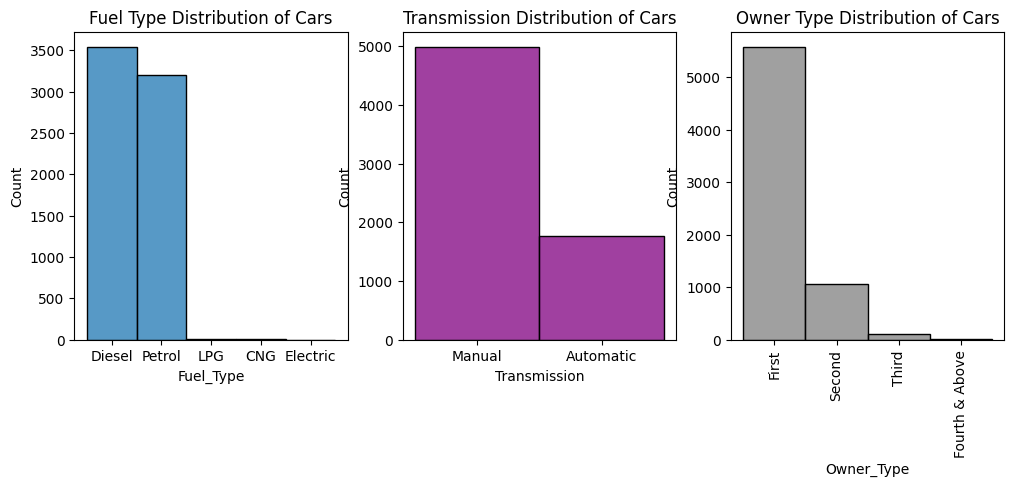

In [3526]:
##Fuel Type
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.histplot(df['Fuel_Type'])
plt.title('Fuel Type Distribution of Cars')
plt.subplot(1,3,2)
sns.histplot(df['Transmission'], color='purple')
plt.title('Transmission Distribution of Cars')
plt.subplot(1,3,3)
sns.histplot(df['Owner_Type'], color='grey')
plt.xticks(rotation=90)
plt.title('Owner Type Distribution of Cars')

- So Here we found the Most of The Cars have mainly fuel_type of Diesel and Petrol.
- The Transmission Type of available used cars is more Manual than Automatic.
- Most Cars to Sell are First Owned Cars in our dataset distribution.

Text(0.5, 1.0, 'Seats Distribution of Cars')

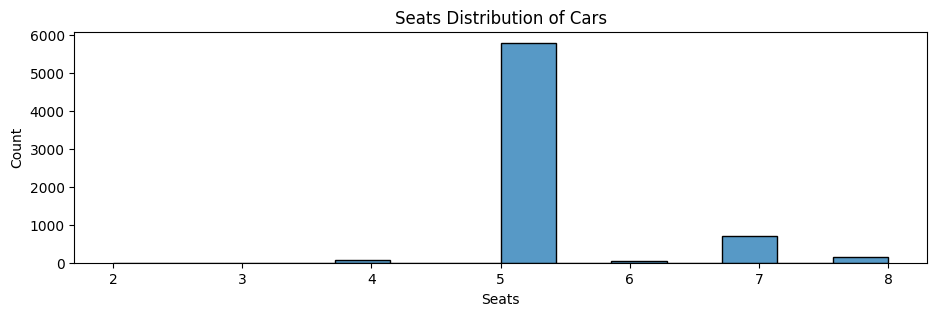

In [3527]:
plt.figure(figsize=(11,3))
# plt.subplot(1,3,1)
sns.histplot(df['Seats'])
plt.title('Seats Distribution of Cars')

Most Cars are 5 Seater in our Dataset and Least Cars are 2 Seater. It tells us Most Used Cars are Family Owned Cars owned by most people. 

### Bivariate Data Analysis

In [3528]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,BrandName
1,Hyundai Creta,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Honda Jazz,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,Maruti Ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Audi A4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi
5,Hyundai EON,Hyderabad,2012,75000,LPG,Manual,First,29.54,814.0,55.20,5.0,2.35,Hyundai


## Co Relation of Features with Price Feature

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


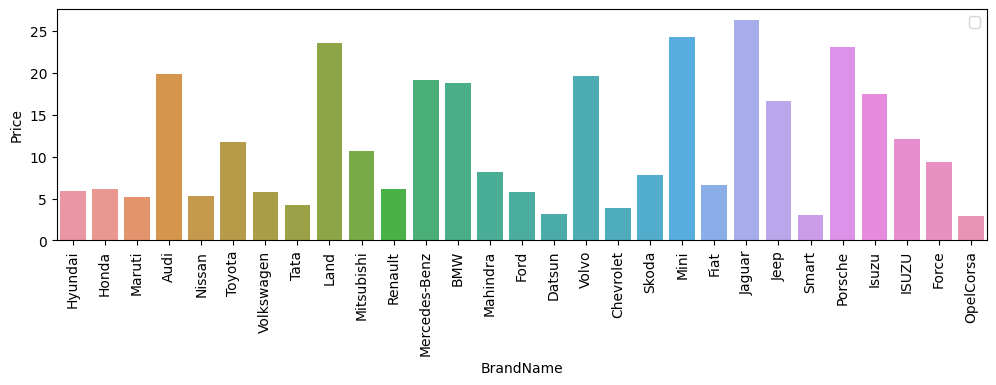

In [3529]:
## BrandName and Price

plt.figure(figsize=(12,3))
sns.barplot(x='BrandName',y='Price', data=df,ci=None)
plt.xticks(rotation=90)
plt.legend()

- Most Expensive Used Cars are either Jaguar, Mini or Porsche, Land and Audi.
- Brand of Cars have Indeed effect in their selling Price.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


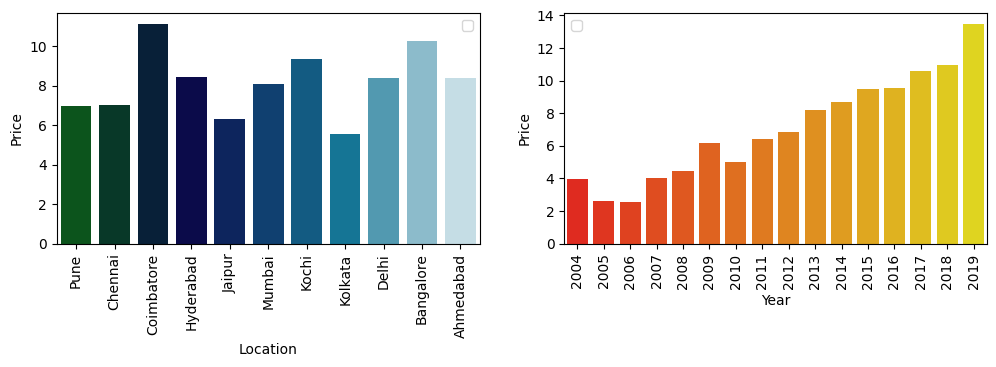

In [3530]:
## Location/YEar and Price

plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
sns.barplot(x='Location',y='Price', data=df,ci=None, palette='ocean')
plt.xticks(rotation=90)
plt.legend()
plt.subplot(1,2,2)
sns.barplot(x='Year',y='Price', data=df,ci=None, palette='autumn')
plt.xticks(rotation=90)
plt.legend()

- Most Expensive Cars are from Coimbatore followed by Bangalore and Kochi.
- Kolkata and Jaipur have the most low budget available used Cars.
- Year Distribution is simple with the Price of Cars. With the Increasing Year the Price of Cars is also Increasing.

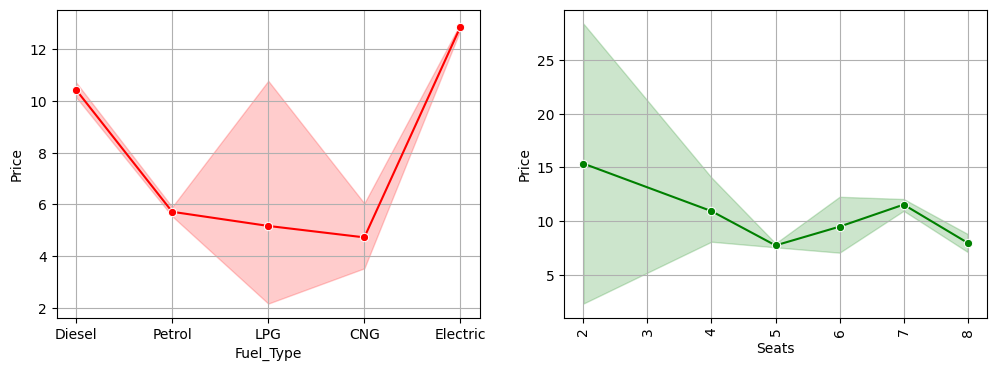

In [3531]:
## Fuel_Type and Seats With Price

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.lineplot(x='Fuel_Type', y='Price', data=df, marker='o',color='red')
# plt.xticks(rotation=90)
plt.grid()
plt.subplot(1,2,2)
sns.lineplot(x='Seats', y='Price', data=df, marker='o',color='green')
plt.xticks(rotation=90)
plt.grid()
# plt.xlim(0,175000)

- Electric and Diesel Cars have higher Price and CNG/LPG Cars have lower Price.
- 5 Seater Cars have low price while 2 Seater Cars have higher Price.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


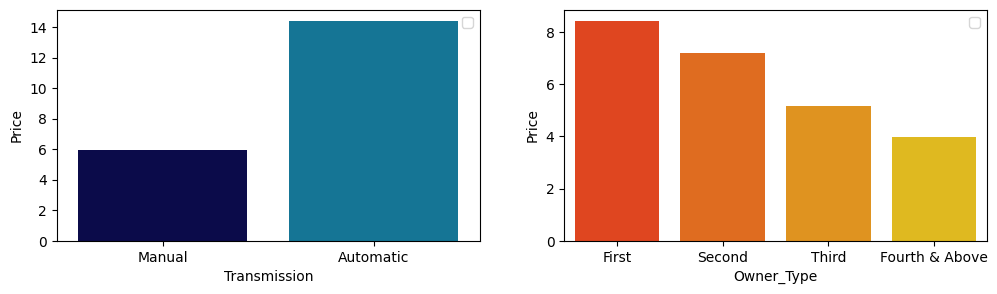

In [3532]:
## Tranmission/Owner_Type and Price

plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
sns.barplot(x='Transmission',y='Price', data=df,ci=None, palette='ocean')
# plt.xticks(rotation=90)
plt.legend()
plt.subplot(1,2,2)
sns.barplot(x='Owner_Type',y='Price', data=df,ci=None, palette='autumn')
# plt.xticks(rotation=90)
plt.legend()

- Here we can see the Distribution of Transmission and Owner Type of Cars with Price of Cars.

#### Let's see our Continuous Numerical Features Relation With Each Other and with Price

In [3533]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,BrandName
1,Hyundai Creta,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Honda Jazz,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,Maruti Ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Audi A4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi
5,Hyundai EON,Hyderabad,2012,75000,LPG,Manual,First,29.54,814.0,55.20,5.0,2.35,Hyundai


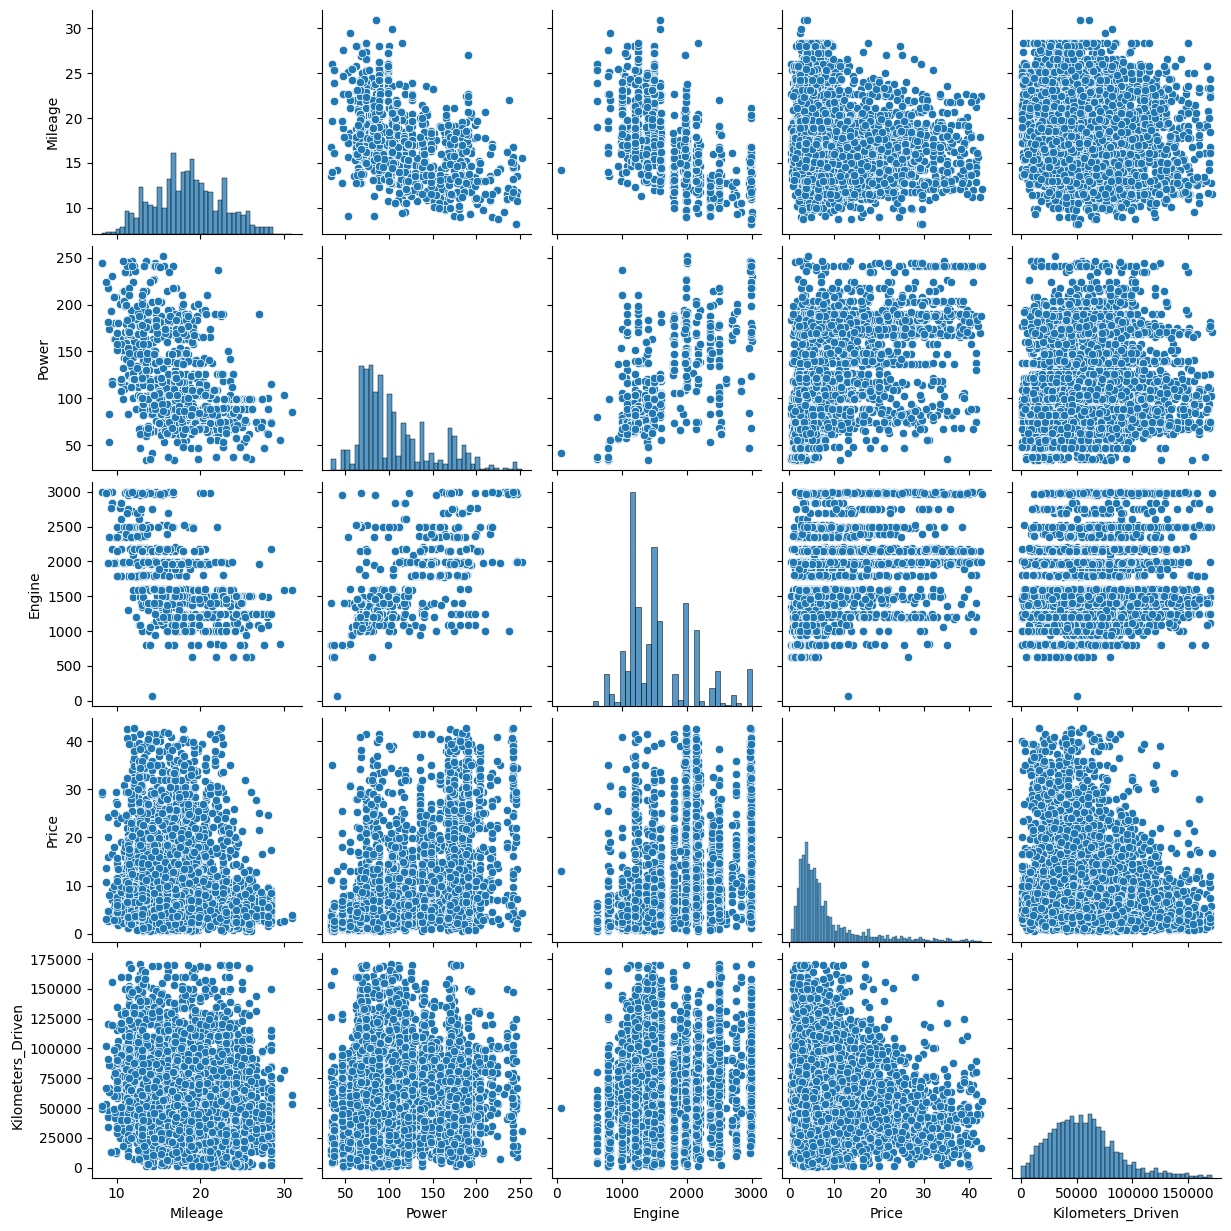

In [3534]:
sns.pairplot(df[['Mileage','Power','Engine','Price','Kilometers_Driven']])

- Here More the Mileage of Cars is less is the Price of Cars. Since more The Mileage of Cars is less is the Power and Engine of those Cars.
- More Kms a Car is Driven, the less is the Price of Cars.
- For Power and Engine there is not much clear Patter but we can notice less Power and Engine Cars have low Price and high Power and Engine Cars have high Price.

<Axes: >

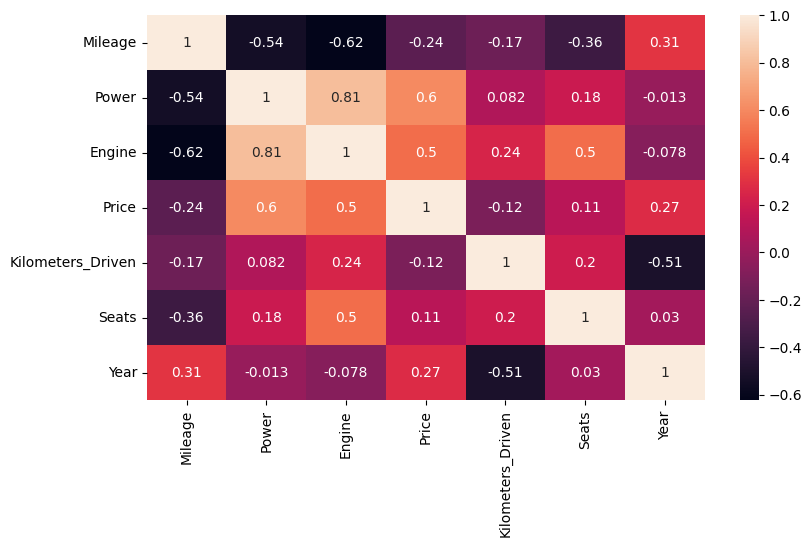

In [3535]:
df1=df[['Mileage','Power','Engine','Price','Kilometers_Driven','Seats','Year']].corr()
plt.figure(figsize=(9,5))
sns.heatmap(df1, annot=True)

**Findings:**

- Mileage Have -ive Relation with Power, Engine , Price, Kilometers Driven, Seats.  More Mileage means less Other Cars factors.
- Power and Engine are highly +ively corelated with Each other. More Power means Higher Engine.
- Power and Engine are +ively corelated with Price also that we observe above also.
- Power and Engine are -ively corelated with Year. Later Manufactured Cars have higher Power/Engine.
- Kilometers Driven is -ively corelated with Year. Later Manufactured Cars will be less kms Driven.
- Seats have high +ive corelation with Engine. Higher Engine Cars will have more number of Seats.

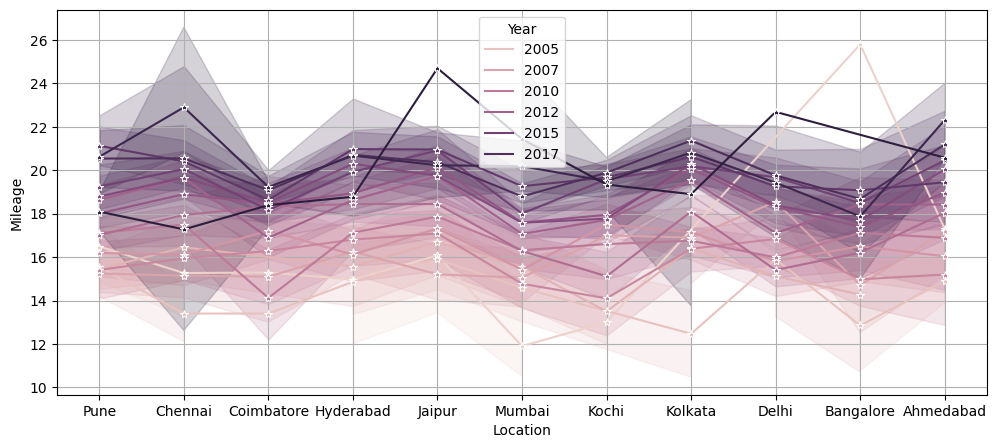

In [3536]:
plt.figure(figsize=(12,5))
sns.lineplot(x='Location', y='Mileage', data=df, marker='*', hue='Year')
plt.grid()

- We can observer that more recent year Cars have better Mileage almost in all Locations except Bangalore.
- Jaipur Location have the Highest Mileage Cars Since there are less expensive cars too there.
- Coimbatore and Bangalore have Low Mileage Cars Since there are more expensive cars there(Higher Power/Engine).

In [3537]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,BrandName
1,Hyundai Creta,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Honda Jazz,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,Maruti Ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Audi A4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi
5,Hyundai EON,Hyderabad,2012,75000,LPG,Manual,First,29.54,814.0,55.20,5.0,2.35,Hyundai


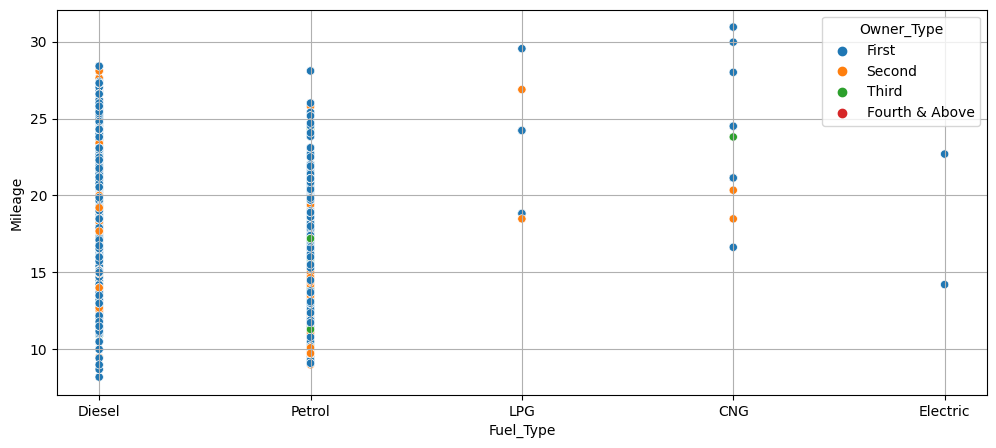

In [3538]:
plt.figure(figsize=(12,5))
sns.scatterplot(hue='Owner_Type', y='Mileage', data=df, marker='o', x='Fuel_Type')
plt.grid()

- Most First and Second Hand Cars are of either Diesel or Petrol Fuel Type.
- CNG Cars have the Highest Mileage.
- The less Owned Used Cars(1st/2nd Hand) have better Mileage of those Cars. 

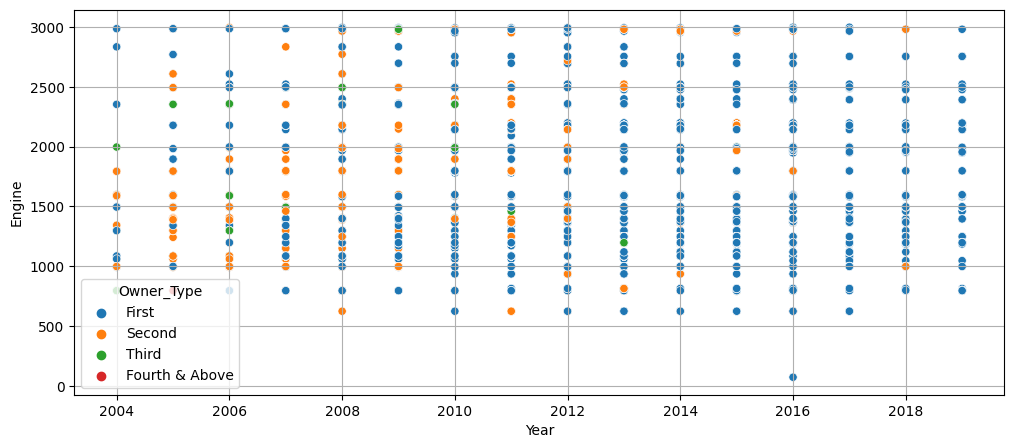

In [3539]:
plt.figure(figsize=(12,5))
sns.scatterplot(hue='Owner_Type', y='Engine', data=df, marker='o', x='Year')
plt.grid()

- For Engine, there's not specific pattern Year wise.
- Mostly First and Second Hand Used Cars have Higher CC Engine.
- Latest Year Cars are mostly First Hand Cars.

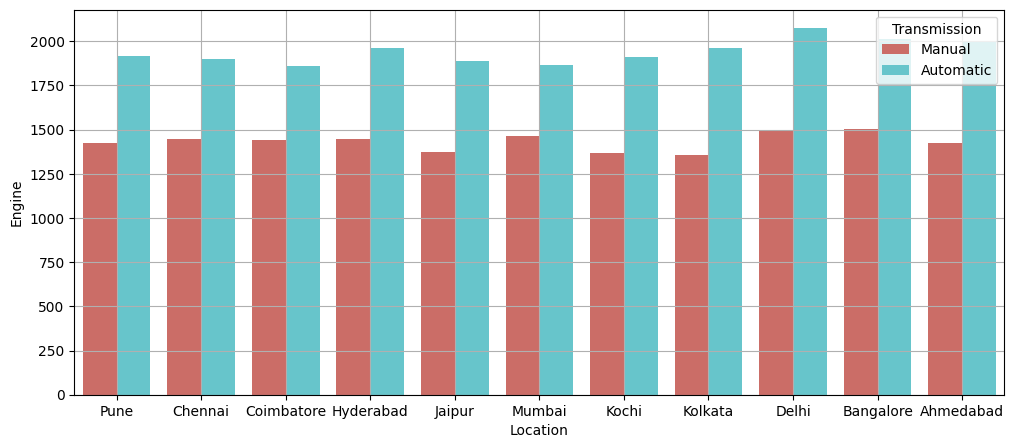

In [3540]:
plt.figure(figsize=(12,5))
sns.barplot(hue='Transmission', y='Engine', data=df, x='Location', ci=None, palette='hls')
plt.grid()

- Delhi have the Highest Engine Automatic Cars followed by Bangalore and Ahmedabad.
- Coimbatore and Mumbai have Lowest Engine Automatic Cars.
- Bangalore have the Highest Engine Manual Cars followed by Delhi and Mumbai.
- Kolkata , Kochi and Jaipur have Lowest Engine Manual Transmission Cars.

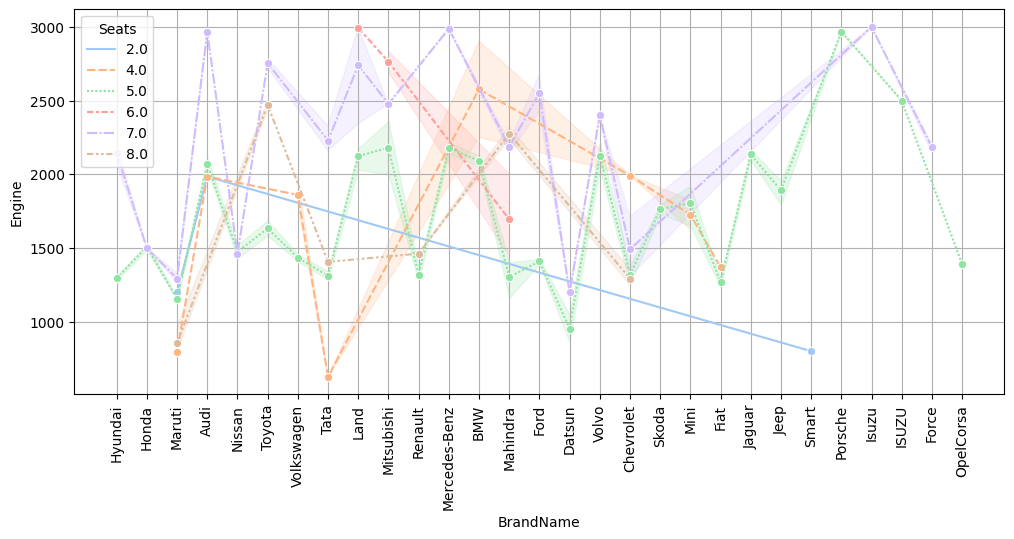

In [3541]:
plt.figure(figsize=(12,5))
sns.lineplot(hue='Seats', y='Engine', data=df, x='BrandName', marker='o', style='Seats',palette='pastel')
plt.xticks(rotation=90)
# for i, (xi, yi) in enumerate(zip(df['BrandName'], df['Engine'])):
#     plt.annotate(f'({xi}, {yi})', (xi, yi), textcoords="offset points", xytext=(0, 10), ha='center')
plt.grid()

- With Better Engine of the Cars More is the Number of Seats in Cars.
- Only Smart, Audi, Maruti Car Brand have 2 seater Cars.
- Most Car Brands have 5 Seater Cars with Mid Range Engine followed by 7 Seater Cars with Higher Engine.

In [3542]:
df[df['Seats']==2]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,BrandName
557,Audi TT,Delhi,2013,12100,Petrol,Automatic,First,9.9,1984.0,207.8,2.0,29.50,Audi
915,Smart Fortwo,Pune,2008,103000,Diesel,Automatic,Second,13.5,799.0,98.6,2.0,3.00,Smart
1288,Audi TT,Kochi,2014,14262,Petrol,Automatic,First,9.9,1984.0,207.8,2.0,27.35,Audi
5015,Maruti Swift,Delhi,2006,63000,Petrol,Manual,First,16.1,1198.0,86.7,2.0,1.60,Maruti


## Skewness

In [3543]:
dt=df.dtypes
d_list=dt[(dt == 'int64') | (dt == 'float64')].index
d_list=d_list.to_list()
d_list
# for i in d_list:
#     sns.distplot(df[i], kde=True)

['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']

<Axes: xlabel='Year', ylabel='Density'>

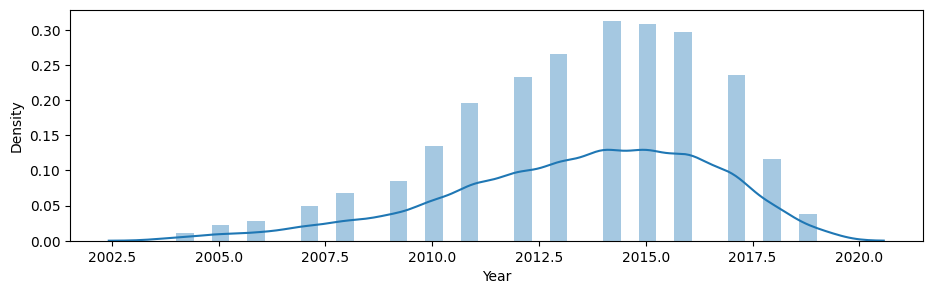

In [3544]:
plt.figure(figsize=(11,3))
sns.distplot(df[d_list[0]], kde=True)

<Axes: xlabel='Kilometers_Driven', ylabel='Density'>

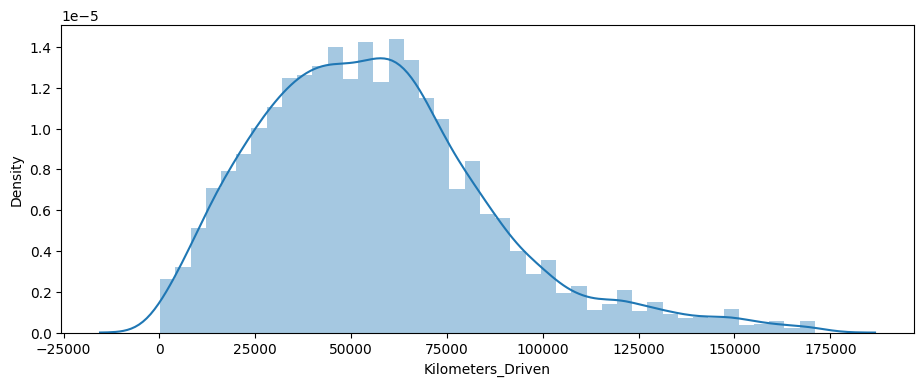

In [3545]:
plt.figure(figsize=(11,3))
sns.distplot(df[d_list[1]], kde=True)

<Axes: xlabel='Mileage', ylabel='Density'>

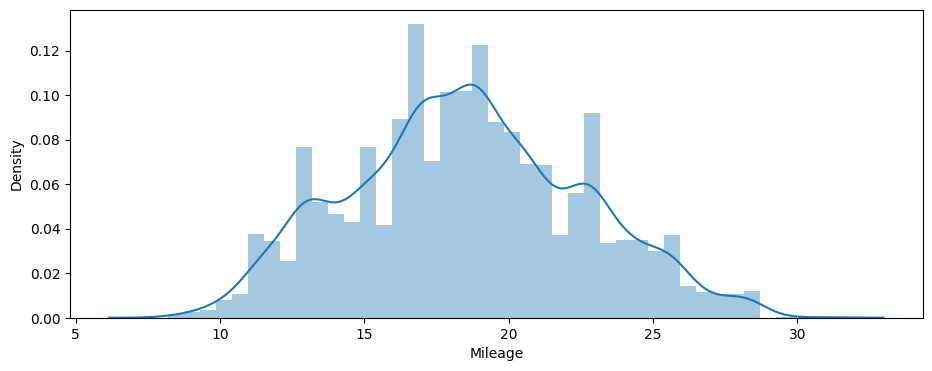

In [3546]:
plt.figure(figsize=(11,3))
sns.distplot(df[d_list[2]], kde=True)

<Axes: xlabel='Engine', ylabel='Density'>

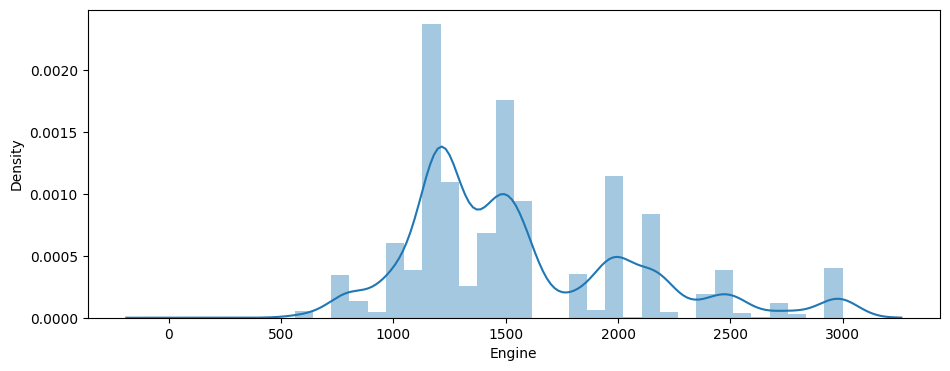

In [3547]:
plt.figure(figsize=(11,3))
sns.distplot(df[d_list[3]], kde=True)

<Axes: xlabel='Power', ylabel='Density'>

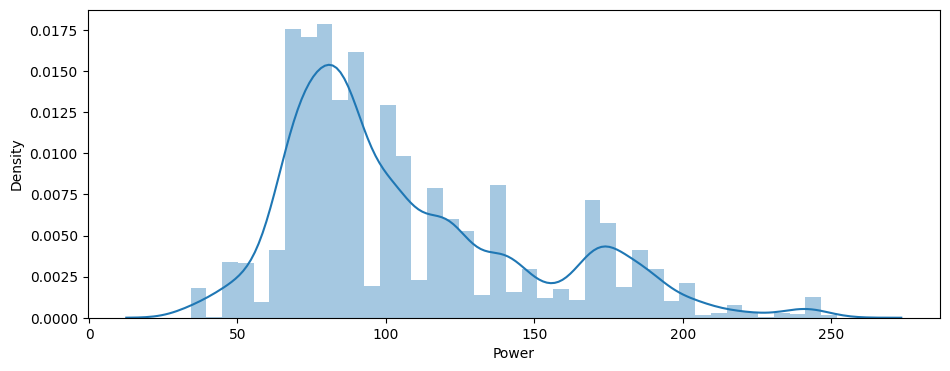

In [3548]:
plt.figure(figsize=(11,3))
sns.distplot(df[d_list[4]], kde=True)

<Axes: xlabel='Seats', ylabel='Density'>

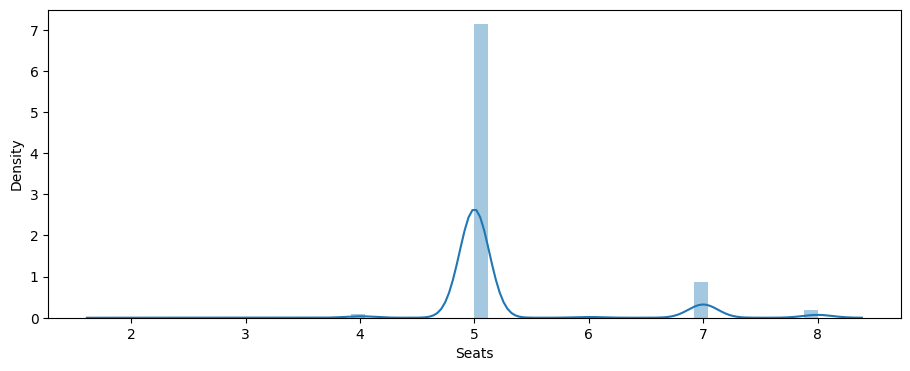

In [3549]:
plt.figure(figsize=(11,3))
sns.distplot(df[d_list[5]], kde=True)

<Axes: xlabel='Price', ylabel='Density'>

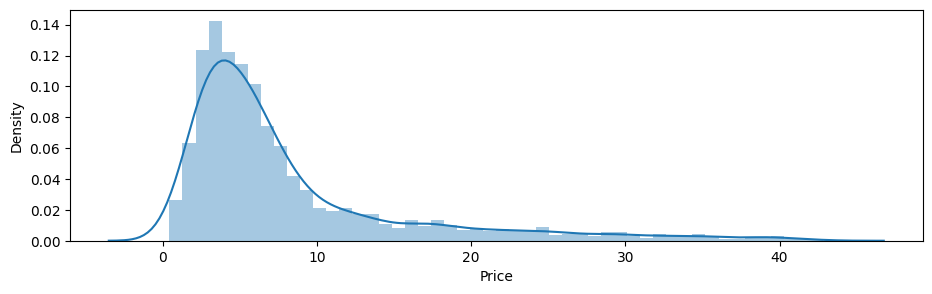

In [3550]:
plt.figure(figsize=(11,3))
sns.distplot(df[d_list[6]], kde=True)

In [3551]:
### Let's Apply Log Transformation for Price and Kilometers Driven Columns. Since there is Right Skewness in those Features Data.

def log_func(x):
    for i in x:
        df[i]=np.log(df[i])

log_func(['Kilometers_Driven', 'Price'])

In [3552]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,BrandName
1,Hyundai Creta,Pune,2015,10.621327,Diesel,Manual,First,19.67,1582.0,126.20,5.0,2.525729,Hyundai
2,Honda Jazz,Chennai,2011,10.736397,Petrol,Manual,First,18.20,1199.0,88.70,5.0,1.504077,Honda
3,Maruti Ertiga,Chennai,2012,11.373663,Diesel,Manual,First,20.77,1248.0,88.76,7.0,1.791759,Maruti
4,Audi A4,Coimbatore,2013,10.613246,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,2.875822,Audi
5,Hyundai EON,Hyderabad,2012,11.225243,LPG,Manual,First,29.54,814.0,55.20,5.0,0.854415,Hyundai


### Feature Engineering

First we will convert our Categorical Features into Numerical features for Model Building ahead.

In [3553]:
import warnings
warnings.filterwarnings('ignore')
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,BrandName
1,Hyundai Creta,Pune,2015,10.621327,Diesel,Manual,First,19.67,1582.0,126.20,5.0,2.525729,Hyundai
2,Honda Jazz,Chennai,2011,10.736397,Petrol,Manual,First,18.20,1199.0,88.70,5.0,1.504077,Honda
3,Maruti Ertiga,Chennai,2012,11.373663,Diesel,Manual,First,20.77,1248.0,88.76,7.0,1.791759,Maruti
4,Audi A4,Coimbatore,2013,10.613246,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,2.875822,Audi
5,Hyundai EON,Hyderabad,2012,11.225243,LPG,Manual,First,29.54,814.0,55.20,5.0,0.854415,Hyundai


In [3554]:
## For Name and Year I am performing Target Ordinal encoding

df1=df.groupby(['BrandName'])['Price'].mean().sort_values().index
df1

Index(['OpelCorsa', 'Smart', 'Chevrolet', 'Datsun', 'Tata', 'Fiat', 'Maruti',
       'Ford', 'Nissan', 'Hyundai', 'Volkswagen', 'Honda', 'Renault', 'Skoda',
       'Mahindra', 'Mitsubishi', 'Force', 'Toyota', 'ISUZU', 'Jeep', 'Porsche',
       'Mercedes-Benz', 'BMW', 'Audi', 'Isuzu', 'Volvo', 'Land', 'Mini',
       'Jaguar'],
      dtype='object', name='BrandName')

In [3555]:
enumerate(df1, 0) ##  We used enumerate here to give a index value to every df1 value. And with below for loop we have 
                     ## created a dictionary of index and values pair.
dict={k:i for i, k in enumerate(df1,0)}
df['Name_R']=df['BrandName'].map(dict)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,BrandName,Name_R
1,Hyundai Creta,Pune,2015,10.621327,Diesel,Manual,First,19.67,1582.0,126.20,5.0,2.525729,Hyundai,9
2,Honda Jazz,Chennai,2011,10.736397,Petrol,Manual,First,18.20,1199.0,88.70,5.0,1.504077,Honda,11
3,Maruti Ertiga,Chennai,2012,11.373663,Diesel,Manual,First,20.77,1248.0,88.76,7.0,1.791759,Maruti,6
4,Audi A4,Coimbatore,2013,10.613246,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,2.875822,Audi,23
5,Hyundai EON,Hyderabad,2012,11.225243,LPG,Manual,First,29.54,814.0,55.20,5.0,0.854415,Hyundai,9


In [3556]:
df.drop(['Name'], inplace=True, axis=1)

In [3557]:
##Location  -- Performing One Hot Encoding

df['Location'].unique()

array(['Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur', 'Mumbai',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [3558]:
pd.get_dummies(df['Location'], drop_first=True, dtype=float).columns
df[['Bangalore', 'Chennai', 'Coimbatore', 'Delhi', 'Hyderabad', 'Jaipur','Kochi', 'Kolkata', 'Mumbai', 'Pune']] = pd.get_dummies(df['Location'], drop_first=True, dtype=float)

In [3559]:
## Year  --- Performing Target Guided Ordinal Encoding

df1= df.groupby(['Year'])['Price'].mean().sort_values().index
df1
dict= {i:k for k,i in enumerate(df1,1)}
df['Year_R']=df['Year'].map(dict)

In [3560]:
df['Fuel_Type'].value_counts()

Fuel_Type
Diesel      3544
Petrol      3204
CNG           16
LPG            9
Electric       2
Name: count, dtype: int64

In [3561]:
df['Owner_Type'].value_counts()

Owner_Type
First             5590
Second            1064
Third              113
Fourth & Above       8
Name: count, dtype: int64

In [3562]:
### let's do One-Hot encoding for Fuel-Type, Owner-Type, Transmission Type of Cars.

In [3563]:
## Fuel Type

l= np.unique(df['Fuel_Type'])
l
df[l[1:]]=pd.get_dummies(df['Fuel_Type'], drop_first=True, dtype=float)
df

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,...,Jaipur,Kochi,Kolkata,Mumbai,Pune,Year_R,Diesel,Electric,LPG,Petrol
1,Pune,2015,10.621327,Diesel,Manual,First,19.67,1582.0,126.20,5.0,...,0.0,0.0,0.0,0.0,1.0,12,1.0,0.0,0.0,0.0
2,Chennai,2011,10.736397,Petrol,Manual,First,18.20,1199.0,88.70,5.0,...,0.0,0.0,0.0,0.0,0.0,8,0.0,0.0,0.0,1.0
3,Chennai,2012,11.373663,Diesel,Manual,First,20.77,1248.0,88.76,7.0,...,0.0,0.0,0.0,0.0,0.0,9,1.0,0.0,0.0,0.0
4,Coimbatore,2013,10.613246,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,...,0.0,0.0,0.0,0.0,0.0,10,1.0,0.0,0.0,0.0
5,Hyderabad,2012,11.225243,LPG,Manual,First,29.54,814.0,55.20,5.0,...,0.0,0.0,0.0,0.0,0.0,9,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Hyderabad,2011,11.400999,Diesel,Manual,First,20.54,1598.0,103.60,5.0,...,0.0,0.0,0.0,0.0,0.0,8,1.0,0.0,0.0,0.0
7249,Mumbai,2015,10.985293,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,...,0.0,0.0,0.0,1.0,0.0,12,0.0,0.0,0.0,1.0
7250,Kolkata,2012,10.239960,Diesel,Manual,First,23.08,1461.0,63.10,5.0,...,0.0,0.0,1.0,0.0,0.0,9,1.0,0.0,0.0,0.0
7251,Pune,2013,10.864025,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,...,0.0,0.0,0.0,0.0,1.0,10,0.0,0.0,0.0,1.0


In [3564]:
# Owner Type

l=np.unique(df['Owner_Type'])
l[1:]
df[l[1:]]=pd.get_dummies(df['Owner_Type'], drop_first=True, dtype=float)


In [3565]:
## Transmission

df['Manual']=pd.get_dummies(df['Transmission'], drop_first=True, dtype=float)
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,...,Pune,Year_R,Diesel,Electric,LPG,Petrol,Fourth & Above,Second,Third,Manual
1,Pune,2015,10.621327,Diesel,Manual,First,19.67,1582.0,126.20,5.0,...,1.0,12,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Chennai,2011,10.736397,Petrol,Manual,First,18.20,1199.0,88.70,5.0,...,0.0,8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,Chennai,2012,11.373663,Diesel,Manual,First,20.77,1248.0,88.76,7.0,...,0.0,9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Coimbatore,2013,10.613246,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,...,0.0,10,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,Hyderabad,2012,11.225243,LPG,Manual,First,29.54,814.0,55.20,5.0,...,0.0,9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [3566]:
## Seats -- Lets do One Hot Encoding for Seats

pd.get_dummies(df['Seats'], drop_first=True, dtype=float)
df[['4','5','6','7','8']]=pd.get_dummies(df['Seats'], drop_first=True, dtype=float)
df.head()


,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,...,Petrol,Fourth & Above,Second,Third,Manual,4,5,6,7,8
1,Pune,2015,10.621327,Diesel,Manual,First,19.67,1582.0,126.20,5.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,Chennai,2011,10.736397,Petrol,Manual,First,18.20,1199.0,88.70,5.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,Chennai,2012,11.373663,Diesel,Manual,First,20.77,1248.0,88.76,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,Coimbatore,2013,10.613246,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,Hyderabad,2012,11.225243,LPG,Manual,First,29.54,814.0,55.20,5.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [3567]:
## Let's drop the Categorical Columns Now

df.drop(['BrandName', 'Location','Year','Fuel_Type','Transmission','Owner_Type','Seats'], inplace=True, axis=1)
df.columns

Index(['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Price', 'Name_R',
       'Bangalore', 'Chennai', 'Coimbatore', 'Delhi', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Mumbai', 'Pune', 'Year_R', 'Diesel', 'Electric',
       'LPG', 'Petrol', 'Fourth & Above', 'Second', 'Third', 'Manual', '4',
       '5', '6', '7', '8'],
      dtype='object')

### Independent and Dependent Features

In [3568]:
x=df.drop('Price',axis=1)
y=df['Price']

In [3569]:
y.shape

(6775,)

### Train Test Split

In [3570]:
from sklearn.model_selection import train_test_split
x_train,  x_test, y_train, y_test= train_test_split(x,y,test_size=0.25, random_state=42)

In [3571]:
x_train.shape, x_test.shape

((5081, 29), (1694, 29))

Now we have our train and test data. Let's do Feature Selection in our Train and Test Data to Optimize our Model.

## Feature Selection

In [3572]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [3573]:
print(model.feature_importances_)

[8.87616298e-02 4.37584442e-02 8.28346896e-02 1.49936571e-01
 1.59148385e-01 7.95145940e-03 7.63829072e-03 1.05107569e-02
 9.32707542e-03 1.13644232e-02 8.36945579e-03 9.90961150e-03
 1.16638159e-02 9.45056104e-03 1.14129320e-02 1.88119352e-01
 1.55208298e-02 7.39230390e-05 9.55863020e-04 2.18801970e-02
 6.62701648e-04 1.50506636e-02 4.80643827e-03 1.03943692e-01
 4.34751335e-03 8.61110280e-03 7.53998937e-04 1.17598278e-02
 1.47579582e-03]


<Axes: >

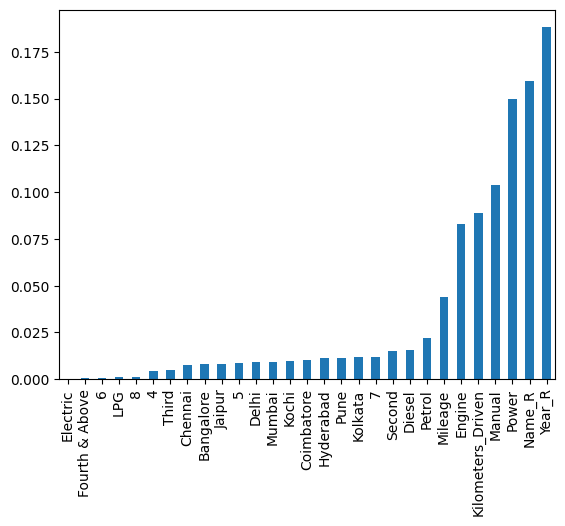

In [3574]:
imp=pd.Series(model.feature_importances_, index=x.columns)
imp.sort_values().plot(kind='bar')

In [3575]:
imp.sort_values()

Electric             0.000074
Fourth & Above       0.000663
6                    0.000754
LPG                  0.000956
8                    0.001476
4                    0.004348
Third                0.004806
Chennai              0.007638
Bangalore            0.007951
Jaipur               0.008369
5                    0.008611
Delhi                0.009327
Mumbai               0.009451
Kochi                0.009910
Coimbatore           0.010511
Hyderabad            0.011364
Pune                 0.011413
Kolkata              0.011664
7                    0.011760
Second               0.015051
Diesel               0.015521
Petrol               0.021880
Mileage              0.043758
Engine               0.082835
Kilometers_Driven    0.088762
Manual               0.103944
Power                0.149937
Name_R               0.159148
Year_R               0.188119
dtype: float64

In [3576]:
# ## Drop the Least important Features

x_train.drop(['Electric','LPG','Fourth & Above','6'], axis=1, inplace=True)
x_test.drop(['Electric','LPG','Fourth & Above','6'], axis=1, inplace=True)
x_test.shape, x_train.shape

((1694, 25), (5081, 25))

In [3577]:
x_train.head()

,Kilometers_Driven,Mileage,Engine,Power,Name_R,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,...,Year_R,Diesel,Petrol,Second,Third,Manual,4,5,7,8
4931,11.112448,18.49,1493.0,100.0,14,0.0,0.0,0.0,0.0,0.0,...,13,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6547,9.837615,21.40,1197.0,83.1,6,0.0,0.0,1.0,0.0,0.0,...,14,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2590,11.251561,13.50,1799.0,130.0,11,0.0,0.0,0.0,0.0,1.0,...,4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3688,10.920528,19.87,1461.0,83.8,12,0.0,0.0,0.0,0.0,0.0,...,11,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1546,10.458349,14.00,796.0,35.0,6,0.0,0.0,0.0,0.0,1.0,...,10,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


### Feature Scaling/Standardization

In [3578]:

from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_train_scale= scaler.fit_transform(x_train) ## -- we apply fit transform to xtrain because we want prediction acc to our train data mainly.
x_test_scale= scaler.transform(x_test)

<Axes: >

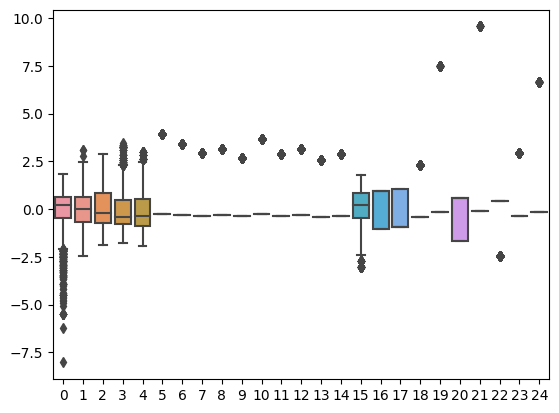

In [3579]:
sns.boxplot(x_train_scale)

### Model Building with Linear Regression

Here we will create our model with train data and Predict our test data with the model created.

In [3585]:
from sklearn.linear_model import LinearRegression
linreg= LinearRegression()
linreg.fit(x_train_scale, y_train)
y_pred= linreg.predict(x_test_scale)

In [3586]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def performance_func(y_pred, y_test):
    mse= mean_squared_error(y_test, y_pred)
    mae= mean_absolute_error(y_test, y_pred)
    r2= r2_score(y_test, y_pred)
    # residuals= y_test-y_pred
    plt.scatter(y_test, y_pred)
    plt.xlabel('y_test')
    plt.ylabel('y_pred')
    # sns.displot(residuals, kind='kde')
    rmse=np.sqrt(mse)
    print('mse',mse)
    print('mae',mae)
    print('r2',r2)
    print('rmse', rmse)
    

Now Let's see the Performance of Our Created Model. If we are getting right Performance and Graph for our target's test data and target's Predicted data.

mse 0.22851134058376957
mae 0.31394250291454284
r2 0.6343189832853242
rmse 0.47802859808150555


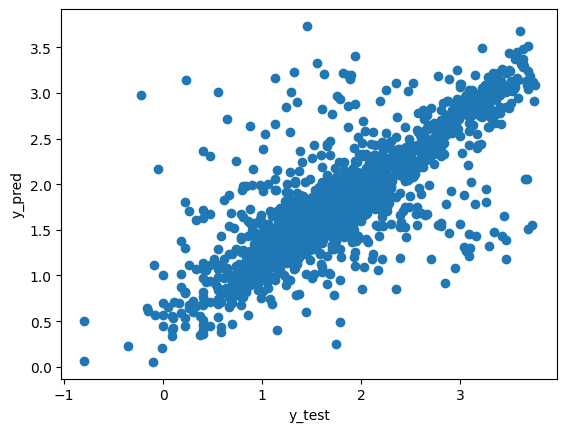

In [3587]:
performance_func(y_pred, y_test)  

**So we can see The good Metrics Score for our Linear Regression Model:**

- **MSE (Mean Squared Error):** 0.2285 is a relatively low value, indicating that the average squared difference between the predicted values (y_pred) and the actual values (y_test) is small.
- **MAE (Mean Absolute Error):** 0.3139 is also a low value, suggesting that the average absolute difference between predicted and actual values is relatively small.
- **R² (R-squared):** 0.6343 is a moderate to high R-squared value, indicating that there's a reasonably good correlation between the predicted and actual values.
- **RMSE (Root Mean Squared Error):** 0.4780 is again a relatively low value, and since it's the square root of MSE, it reflects a similar trend of small prediction errors.765

In [ ]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV()
lassocv.fit(x_train_scale, y_train)
y_pred= lassocv.predict(x_test_scale)
performance_func(y_pred, y_test)

**I checked with LassoCV Prediction Model too. But I am getting better metrics scores and graph with Linear Regression Model. So I will go with Linear Regression Model**

## OLS Linear Regression

In [3588]:
import statsmodels.api as s
model=sm.OLS(y_train,x_train_scale).fit()

In [3589]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.099
Model:                            OLS   Adj. R-squared (uncentered):              0.094
Method:                 Least Squares   F-statistic:                              22.17
Date:                Fri, 19 Apr 2024   Prob (F-statistic):                    1.75e-95
Time:                        13:37:34   Log-Likelihood:                         -10309.
No. Observations:                5081   AIC:                                  2.067e+04
Df Residuals:                    5056   BIC:                                  2.083e+04
Df Model:                          25                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0348      0.034     -1.021      0.307      -0.102       0.032
x2            -0.0211      0.048     -0.444      0.657      -0.115       0.072
x3             0.0825      0.067      1.238      0.216      -0.048       0.213
x4             0.1923      0.055      3.466      0.001       0.084       0.301
x5             0.1848      0.042      4.419      0.000       0.103       0.267
x6             0.0216      0.041      0.531      0.596      -0.058       0.101
x7             0.0030      0.044      0.067      0.946      -0.083       0.089
x8             0.0235      0.048      0.486      0.627      -0.071       0.118
x9            -0.0215      0.046     -0.469      0.639      -0.111       0.068
x10            0.0186      0.050      0.372      0.710      -0.079       0.117
x11           -0.0153      0.042     -0.364      0.716      -0.098       0.067
x12           -0.0099      0.049     -0.203      0.839      -0.105       0.085
x13           -0.0564      0.046     -1.219      0.223      -0.147       0.034
x14           -0.0139      0.052     -0.268      0.789      -0.116       0.088
x15           -0.0071      0.048     -0.148      0.882      -0.101       0.087
x16            0.2959      0.037      7.954      0.000       0.223       0.369
x17            0.0266      0.199      0.134      0.893      -0.363       0.417
x18           -0.0645      0.200     -0.323      0.747      -0.457       0.328
x19           -0.0101      0.028     -0.362      0.717      -0.065       0.045
x20           -0.0200      0.027     -0.741      0.459      -0.073       0.033
x21           -0.0565      0.036     -1.575      0.115      -0.127       0.014
x22           -0.0067      0.044     -0.153      0.878      -0.092       0.079
x23            0.0448      0.117      0.382      0.703      -0.185       0.275
x24            0.0350      0.103      0.339      0.735      -0.168       0.238
x25            0.0133      0.055      0.243      0.808      -0.094       0.121
==============================================================================
Omnibus:                      732.488   Durbin-Watson:                   0.149
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9141.608
Skew:                           0.235   Prob(JB):                         0.00
Kurtosis:                       9.554   Cond. No.                         22.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3590]:
print(linreg.coef_)

[-0.03480987 -0.02113215  0.08250445  0.19227487  0.18477025  0.02159265
  0.00296839  0.0234809  -0.02150458  0.01859645 -0.01534278 -0.0098926
 -0.05636432 -0.01389511 -0.00713269  0.29593532  0.0266325  -0.06451639
 -0.01014335 -0.0199597  -0.0564638  -0.00670377  0.04482942  0.03501705
  0.01329502]


**We can see our corefficient values of Linear Regression Prediction Model and OLS Regression Results coefficient values are Approximately the same.
So we can conclude that our model is a decent prediction model for Predicting Price Values from Other Independent Feature Values in the DataSet.**